In [18]:
#created by Chna in 1995
#This plot is used for wells producing water or under flooding to know hen there is water breakthorugh.


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = '1-wor.txt'

df = pd.read_csv(filename, sep='\t')


C:\Users\imomoh\AppData\Local\Temp\ipykernel_20900\2506652234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wor'"][i] = (df["Wor"][i] - df["Wor"][i-1])/(df["Month"][i] - df["Month"][i-1])


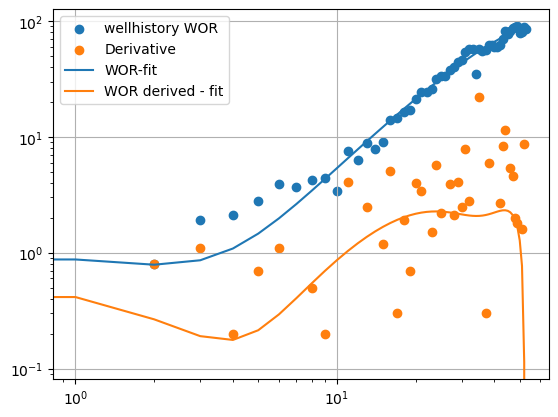

In [20]:
def create_fit(x,y,degree = 1):
    polyfit = np.polyfit(x,y,degree)

    poly_func = np.poly1d(polyfit)

    y_fitted = poly_func(x) #this x is tthe historical data

    return y_fitted, x




df["Wor'"] = 0 #creating a place holder for values ina new column of the derivatives of WOR

for i in range(1,len(df)):#using one makes the calculaation start at the second row
    df["Wor'"][i] = (df["Wor"][i] - df["Wor"][i-1])/(df["Month"][i] - df["Month"][i-1])


#cretae fittign for both historical adnd derived data

wor_hist, x = create_fit(df["Month"], df["Wor"], 3)
wor_derv, x_derv = create_fit(df["Month"], df["Wor'"], 6)


#plot historical data
plt.scatter(df['Month'], df['Wor'], label = 'wellhistory WOR')
#add teh derivative to the plot
plt.scatter(df['Month'], df["Wor'"], label = 'Derivative') #since thi splot shows a scattered results, we should creare a derivattive with smoothing.
#plot the fitted data here
plt.plot(x, wor_hist,label = 'WOR-fit')
plt.plot(x_derv, wor_derv, label = 'WOR derived - fit')
plt.xscale('log'); plt.yscale('log')
plt.legend()
plt.grid()
plt.show()